**How do actions taken, events, and interventions match up with the epidemic numbers in our three countries of interest: Guinea, Sierra Leone, and Liberia?**

Necessary imports and reading in the data from csv files

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

liberia_data = pd.read_csv('liberia.csv')
sierraleone_data = pd.read_csv('SierraLeone.csv')
guinea_data = pd.read_csv('Guinea.csv')


Ensure that the date is in the correct format

In [ ]:
liberia_data['Date'] = pd.to_datetime(liberia_data['Date'])
sierraleone_data['Date'] = pd.to_datetime(sierraleone_data['Date'])
guinea_data['Date'] = pd.to_datetime(guinea_data['Date'])

Liberia data requires a little bit of extra cleaning and adjustment as agreed on in our group meetings and discussions - the same modifications were done for time series and survival analysis

In [ ]:
liberia_data['Suspected/Confirmed/Probable Cases'] = liberia_data['Suspected/Confirmed/Probable Cases'].astype(float)
liberia_data['Suspected/Confirmed/Probable Deaths'] = liberia_data['Suspected/Confirmed/Probable Deaths'].astype(float)
liberia_data = liberia_data[~liberia_data['Suspected/Confirmed/Probable Cases'].isna()]
liberia_data = liberia_data[liberia_data['Suspected/Confirmed/Probable Cases'] > 40]
liberia_data = liberia_data[liberia_data['Suspected/Confirmed/Probable Deaths'] > 10]
liberia_data = liberia_data[~np.isinf(liberia_data['Suspected/Confirmed/Probable Cases'])]

Liberia

In [ ]:
# need to consider which events to include for the clarity and readability of the graph
liberia_events = [
    ("April 1, 2014", "USAID-funded Project Responds to Ebola in Liberia"),
    ("June 17, 2014", "Ebola hits Monrovia (the capital - major urban area)"),
    ("July 30, 2014", "Liberian government shuts down schools"),
    ("August 6, 2014", "Cremation of victims mandated and quarantine: West Point, Monrovia"),
    ("November 2, 2014", "Rapid Community Assessments on Safe Burial"),
    ("January 15, 2015", "Back to School Messaging"),
    ("February 1, 2015", "Vaccine Trial launched in Monrovia"),
    ("May 9, 2015", "Liberia declared Ebola-free (42 days, no new cases)"),
    ("June 30, 2015", "Virus returns to Liberia"),
    ("January 14, 2016", "Liberia finally declared Ebola-free")
]
liberia_events = [(pd.to_datetime(date), event) for date, event in liberia_events]

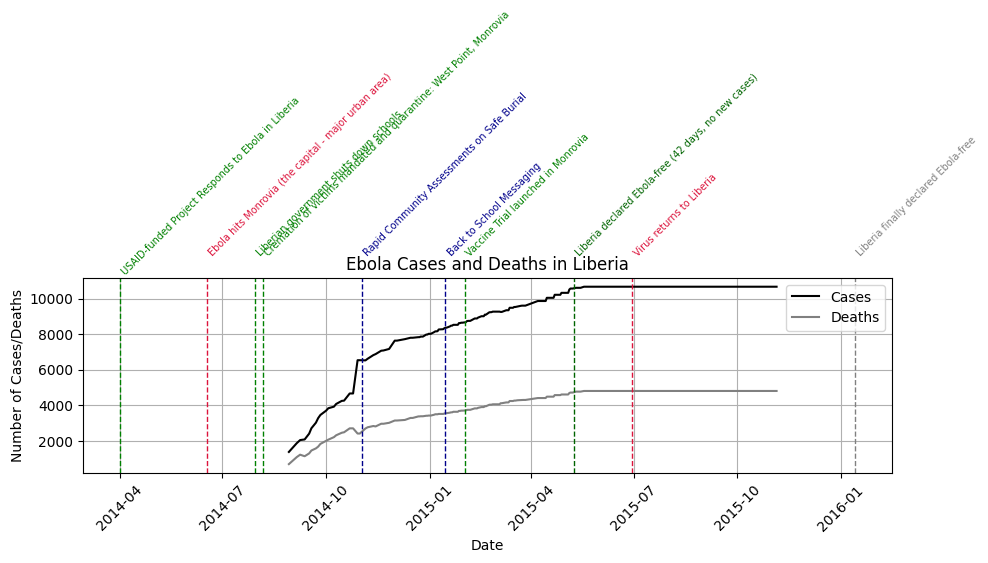

In [ ]:
event_colors = [
    'green', 'crimson', 'green', 'green', 'darkblue', 'darkblue', 'green',
    'darkgreen', 'crimson', 'grey'
]

plt.figure(figsize=(10, 6))

plt.plot(liberia_data['Date'], liberia_data['Suspected/Confirmed/Probable Cases'], label='Cases', color='black')
plt.plot(liberia_data['Date'], liberia_data['Suspected/Confirmed/Probable Deaths'], label='Deaths', color='grey')

last_y_position = 0

for i, (event_date, event_desc) in enumerate(liberia_events):
    plt.axvline(event_date, color=event_colors[i % len(event_colors)], linestyle='--', linewidth=1)

    y_offset = (i % 2) * 0.1
    max_cases = max(liberia_data['Suspected/Confirmed/Probable Cases'])
    label_y_position = max_cases * (1.05 + y_offset)

    if label_y_position < last_y_position:
        y_offset += 0.1
        label_y_position = max_cases * (1.05 + y_offset)

    last_y_position = label_y_position

    plt.text(event_date, label_y_position, event_desc, rotation=45, ha='left', va='bottom', fontsize=7, color=event_colors[i % len(event_colors)])

plt.title('Ebola Cases and Deaths in Liberia')
plt.xlabel('Date')
plt.ylabel('Number of Cases/Deaths')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()



* Red: Event or case numbers of note
* Blue: Attempts to change social behaviors
* Green: More direct intervention attempts

Sierra Leone

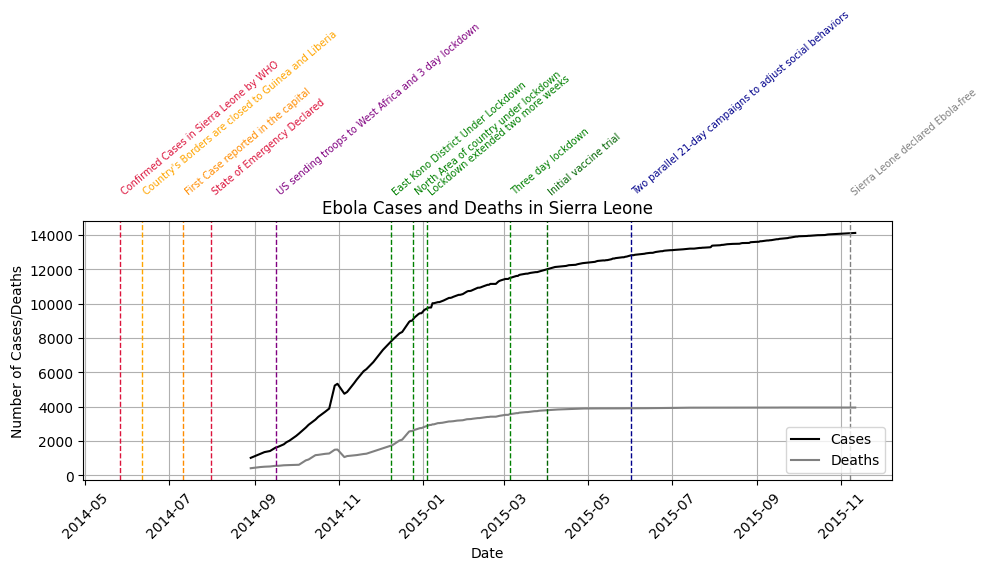

In [ ]:
sierraleone_events = [
    ("May 26, 2014", "Confirmed Cases in Sierra Leone by WHO"),
    ("June 11, 2014", "Country's Borders are closed to Guinea and Liberia"),
    ("July 11, 2014", "First Case reported in the capital"),
    ("July 31, 2014", "State of Emergency Declared"),
    ("September 16, 2014", "US sending troops to West Africa and 3 day lockdown"),
    ("December 9, 2014", "East Kono District Under Lockdown"),
    ("December 25, 2014", "North Area of country under lockdown"),
    ("January 4, 2015", "Lockdown extended two more weeks"),
    ("March 5, 2015", "Three day lockdown"),
    ("April 1, 2015", "Initial vaccine trial"),
    ("June 1, 2015", "Two parallel 21-day campaigns to adjust social behaviors"),
    ("November 7, 2015", "Sierra Leone declared Ebola-free")
]

sierraleone_events = [(pd.to_datetime(date), event) for date, event in sierraleone_events]

event_colors = [
    'crimson', 'orange', 'darkorange', 'crimson', 'purple', 'green', 'green',
    'green', 'green', 'darkgreen', 'darkblue', 'grey'
]

plt.figure(figsize=(10, 6))
plt.plot(sierraleone_data['Date'], sierraleone_data['Suspected/Confirmed/Probable Cases'], label='Cases', color='black')
plt.plot(sierraleone_data['Date'], sierraleone_data['Suspected/Confirmed/Probable Deaths'], label='Deaths', color='grey')

for i, (event_date, event_desc) in enumerate(sierraleone_events):
    plt.axvline(event_date, color=event_colors[i % len(event_colors)], linestyle='--', linewidth=1)
    y_offset = (i % 2) * 0.2
    plt.text(event_date, max(sierraleone_data['Suspected/Confirmed/Probable Cases']) * (1.15),
             event_desc, rotation=40, ha='left', va='bottom', fontsize=7, color=event_colors[i % len(event_colors)])

plt.title('Ebola Cases and Deaths in Sierra Leone')
plt.xlabel('Date')
plt.ylabel('Number of Cases/Deaths')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

similar color scheme as above for Liberia, but purple is evidence of foreign interference

Guinea

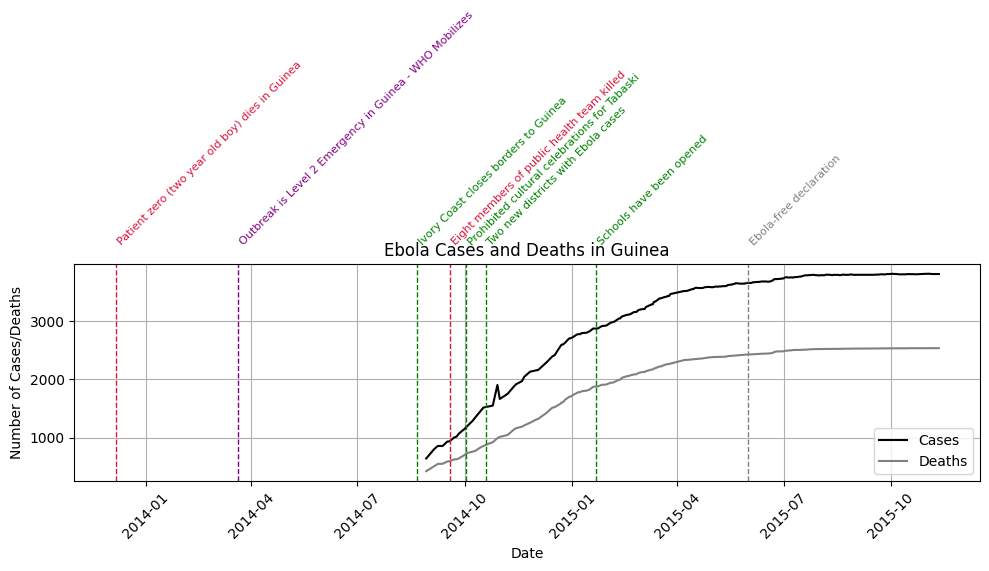

In [ ]:
guinea_events = [
    ("December 6, 2013", "Patient zero (two year old boy) dies in Guinea"),
    ("March 21, 2014", "Outbreak is Level 2 Emergency in Guinea - WHO Mobilizes"),
    ("September 18, 2014", "Eight members of public health team killed"),
    ("August 21, 2014", "Ivory Coast closes borders to Guinea"),
    ("October 2, 2014", "Prohibited cultural celebrations for Tabaski"),
    ("October 19, 2014", "Two new districts with Ebola cases"),
    ("January 21, 2015", "Schools have been opened"),
    ("June 1, 2015", "Ebola-free declaration")
]

guinea_events = [(pd.to_datetime(date), event) for date, event in guinea_events]

event_colors = [
    'crimson', 'purple', 'crimson', 'green', 'green', 'green', 'green', 'grey'
]


plt.figure(figsize=(10, 6))
plt.plot(guinea_data['Date'], guinea_data['Suspected/Confirmed/Probable Cases'], label='Cases', color='black')
plt.plot(guinea_data['Date'], guinea_data['Suspected/Confirmed/Probable Deaths'], label='Deaths', color='grey')

for i, (event_date, event_desc) in enumerate(guinea_events):
    plt.axvline(event_date, color=event_colors[i % len(event_colors)], linestyle='--', linewidth=1)
    y_offset = (i % 2) * 0.1
    plt.text(event_date, max(guinea_data['Suspected/Confirmed/Probable Cases']) * (1.12),
             event_desc, rotation=45, ha='left', va='bottom', fontsize=8, color=event_colors[i % len(event_colors)])

plt.title('Ebola Cases and Deaths in Guinea')
plt.xlabel('Date')
plt.ylabel('Number of Cases/Deaths')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()